# Welcome to Lab 4!

# Today's Motivation:

## "Every great model starts with a single line of code, and every skill with a single step of practice. Stay consistent, stay curious - because progress in machine learning, like in life, comes from persistence."  -Dhruv Panchal.

## pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
object_type_columns = df.select_dtypes(include=["object"])
object_type_columns

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000
...,...
21608,20140521T000000
21609,20150223T000000
21610,20140623T000000
21611,20150116T000000


In [7]:
df.drop(object_type_columns, axis=1, inplace=True)
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [8]:
df.drop("id", axis=1, inplace=True)

df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


### id and date are identifiers, not useful for prediction.

In [9]:
df.shape

(21613, 19)

In [10]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### No missing values.

## lets divide the data into independent and dependent feature

In [12]:
X = df.drop("price", axis=1)
y = df["price"]
X.shape, y.shape

((21613, 18), (21613,))

## right now there is only a numerical features we have so, lets do the scaling.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
## but before that lets devide the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 18), (4323, 18), (17290,), (4323,))

## Define the scaler

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [16]:
scaler.feature_names_in_

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [17]:
scaler.get_feature_names_out()

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [18]:
scaler.mean_

array([ 3.36813187e+00,  2.11379410e+00,  2.07389491e+03,  1.47989474e+04,
        1.49916136e+00,  7.17177559e-03,  2.33024870e-01,  3.40757663e+00,
        7.65384615e+00,  1.78596217e+03,  2.87932736e+02,  1.97110833e+03,
        8.30034124e+01,  9.80779744e+04,  4.75603296e+01, -1.22214139e+02,
        1.98290457e+03,  1.27250593e+04])

In [19]:
scaler.scale_

array([9.31358475e-01, 7.66767837e-01, 9.07271725e+02, 3.88381253e+04,
       5.42802841e-01, 8.43821144e-02, 7.61727011e-01, 6.51678771e-01,
       1.17032098e+00, 8.21602529e+02, 4.38714422e+02, 2.94347521e+01,
       3.98491726e+02, 5.33245417e+01, 1.38427975e-01, 1.40494240e-01,
       6.81212725e+02, 2.75244623e+04])

## Individual features scaler

In [20]:
scaler_sqft_living = StandardScaler()
scaler_sqft_living.fit(X_train[["sqft_living"]])
scaler_sqft_living.mean_, scaler_sqft_living.scale_

(array([2073.89491035]), array([907.27172533]))

In [21]:
X_train.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800


In [22]:
X_train.bedrooms.unique()

array([ 3,  2,  5,  4,  1,  6,  7,  0,  9,  8, 33, 10])

In [23]:
X_train.bathrooms.unique()

array([1.75, 1.  , 2.25, 2.5 , 2.75, 3.  , 2.  , 3.25, 1.5 , 4.  , 3.5 ,
       4.5 , 3.75, 0.5 , 5.5 , 4.75, 0.75, 5.25, 6.  , 4.25, 0.  , 1.25,
       5.  , 6.25, 7.75, 8.  , 5.75, 6.75, 6.5 ])

In [24]:
for col in X_train.columns:
    print("-"*30)
    print(f"\n For feature: {col}, all nuiques values are: {X_train[col].unique()}, \n Total uniques values are: {X_train[col].nunique()}")
    print()


------------------------------

 For feature: bedrooms, all nuiques values are: [ 3  2  5  4  1  6  7  0  9  8 33 10], 
 Total uniques values are: 12

------------------------------

 For feature: bathrooms, all nuiques values are: [1.75 1.   2.25 2.5  2.75 3.   2.   3.25 1.5  4.   3.5  4.5  3.75 0.5
 5.5  4.75 0.75 5.25 6.   4.25 0.   1.25 5.   6.25 7.75 8.   5.75 6.75
 6.5 ], 
 Total uniques values are: 29

------------------------------

 For feature: sqft_living, all nuiques values are: [ 1780  1000  1080  2090  1741  2340  2040  3320  1760  1610  1190  2480
  1390  1040  2980  1470   700  4350  1560  2760  2448  1540  3160  1930
  3020  2510  1590  3810  1900  2993  1440  1120  1750  2130  2483  1410
  3040  2810  4940  1380  3050  3366  1730  1740  2410  1460  1430  1320
  1660  3200  2750  1180  2052  2530  1060  2070  2440  1020  2030  2260
  3000  2670  1150  2770  1790  2100  2630  2240  3370  1500   550  4115
  1820  1100  1210  2220  1700  3060  1620  2520  3760  2740  1550

### As we know that latitude and lognitude are represnting the location(position). so if we just standarize all the features then we are just making wrong steps.

In [25]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## now we have to drop that features

In [26]:
X_train.drop(["lat","long","zipcode"],axis=1,inplace=True)
X_test.drop(["lat","long","zipcode"],axis=1,inplace=True)
X_train.shape

(17290, 15)

## Note: Not all features are true numerical features. like bedrooms, yr_renovated, yr_built, so we should not normalize this features.

In [27]:
X_train.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,1170,7800


In [28]:
features_to_normalize = ["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]
X_train[features_to_normalize]

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
6325,1780,13095,1780,0,2750,13095
13473,1000,3700,800,200,1270,5000
17614,1080,7486,990,90,1170,7800
16970,2090,7500,1280,810,1800,7350
20868,1741,1439,1446,295,2090,10454
...,...,...,...,...,...,...
11964,1000,6914,1000,0,1000,6947
21575,3087,5002,3087,0,2927,5183
5390,2120,4780,2120,0,1690,2650
860,380,15000,380,0,1170,15000


In [29]:
scaler = StandardScaler()
scaler.fit(X_train[features_to_normalize])

StandardScaler()

In [30]:
scaler.mean_

array([ 2073.89491035, 14798.94736842,  1785.96217467,   287.93273569,
        1982.90456912, 12725.05934066])

In [31]:
scaler.scale_

array([  907.27172533, 38838.12532777,   821.60252905,   438.71442238,
         681.21272455, 27524.46228583])

## we have scale our training data so the same scaler we have to use for scaling the test data.

## so lets first save this scaler.

In [32]:
import pickle

In [33]:
pickle.dump(scaler, open("scaler.pkl","wb"))

In [34]:
## lets load back the scaler
scaler_test = pickle.load(open("scaler.pkl","rb"))
scaler_test

StandardScaler()

In [35]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,1170,7800
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,1800,7350
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,2090,10454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,0,1000,6947
21575,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,0,2927,5183
5390,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,0,1690,2650
860,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,1170,15000


## we have train the scaler so lets scale down our values

In [36]:
x_scaled_values = scaler.transform(X_train[features_to_normalize])
x_scaled_values

array([[-0.32393262, -0.04387306, -0.00725676, -0.65631017,  1.12607326,
         0.01344043],
       [-1.18365301, -0.28577454, -1.20004764, -0.20043274, -1.04652268,
        -0.28066159],
       [-1.09547656, -0.18829301, -0.96879226, -0.45116533, -1.19331971,
        -0.1789339 ],
       ...,
       [ 0.05081729, -0.25796681,  0.40656864, -0.65631017, -0.42997519,
        -0.36604019],
       [-1.8670205 ,  0.00517668, -1.71124373, -0.65631017, -1.19331971,
         0.08265159],
       [ 1.16404497, -0.22658013,  1.63587352, -0.65631017,  1.52242522,
        -0.24443927]])

In [37]:
x_scaled_df = pd.DataFrame(x_scaled_values, columns=features_to_normalize)
x_scaled_df

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,-0.323933,-0.043873,-0.007257,-0.656310,1.126073,0.013440
1,-1.183653,-0.285775,-1.200048,-0.200433,-1.046523,-0.280662
2,-1.095477,-0.188293,-0.968792,-0.451165,-1.193320,-0.178934
3,0.017751,-0.187933,-0.615824,1.189993,-0.268498,-0.195283
4,-0.366919,-0.343991,-0.413779,0.016109,0.157213,-0.082511
...,...,...,...,...,...,...
17285,-1.183653,-0.203021,-0.956621,-0.656310,-1.442875,-0.209925
17286,1.116650,-0.252251,1.583537,-0.656310,1.385904,-0.274013
17287,0.050817,-0.257967,0.406569,-0.656310,-0.429975,-0.366040
17288,-1.867021,0.005177,-1.711244,-0.656310,-1.193320,0.082652


In [38]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [39]:
remaining_features = [col for col in X_train.columns if col not in features_to_normalize]

remaining_features

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'yr_renovated']

In [40]:
x_scaled_df

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,-0.323933,-0.043873,-0.007257,-0.656310,1.126073,0.013440
1,-1.183653,-0.285775,-1.200048,-0.200433,-1.046523,-0.280662
2,-1.095477,-0.188293,-0.968792,-0.451165,-1.193320,-0.178934
3,0.017751,-0.187933,-0.615824,1.189993,-0.268498,-0.195283
4,-0.366919,-0.343991,-0.413779,0.016109,0.157213,-0.082511
...,...,...,...,...,...,...
17285,-1.183653,-0.203021,-0.956621,-0.656310,-1.442875,-0.209925
17286,1.116650,-0.252251,1.583537,-0.656310,1.385904,-0.274013
17287,0.050817,-0.257967,0.406569,-0.656310,-0.429975,-0.366040
17288,-1.867021,0.005177,-1.711244,-0.656310,-1.193320,0.082652


In [41]:
x_scaled_df.index = X_train.index
x_scaled_df

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
6325,-0.323933,-0.043873,-0.007257,-0.656310,1.126073,0.013440
13473,-1.183653,-0.285775,-1.200048,-0.200433,-1.046523,-0.280662
17614,-1.095477,-0.188293,-0.968792,-0.451165,-1.193320,-0.178934
16970,0.017751,-0.187933,-0.615824,1.189993,-0.268498,-0.195283
20868,-0.366919,-0.343991,-0.413779,0.016109,0.157213,-0.082511
...,...,...,...,...,...,...
11964,-1.183653,-0.203021,-0.956621,-0.656310,-1.442875,-0.209925
21575,1.116650,-0.252251,1.583537,-0.656310,1.385904,-0.274013
5390,0.050817,-0.257967,0.406569,-0.656310,-0.429975,-0.366040
860,-1.867021,0.005177,-1.711244,-0.656310,-1.193320,0.082652


In [42]:
X_train.shape

(17290, 15)

In [43]:
x_scaled_df.shape

(17290, 6)

In [44]:
X_train[features_to_normalize] = x_scaled_df
X_train.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
6325,3,1.75,-0.323933,-0.043873,1.0,0,0,4,9,-0.007257,-0.656310,1983,0,1.126073,0.013440
13473,2,1.00,-1.183653,-0.285775,1.0,0,0,3,6,-1.200048,-0.200433,1929,0,-1.046523,-0.280662
17614,3,1.00,-1.095477,-0.188293,1.5,0,0,3,6,-0.968792,-0.451165,1942,0,-1.193320,-0.178934


In [45]:
X_train.shape

(17290, 15)

In [46]:
X_train.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [47]:
X_test.shape

(4323, 15)

## lets import our first model called Linear Regression.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()
model

LinearRegression()

In [50]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [51]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
6325,3,1.75,-0.323933,-0.043873,1.0,0,0,4,9,-0.007257,-0.656310,1983,0,1.126073,0.013440
13473,2,1.00,-1.183653,-0.285775,1.0,0,0,3,6,-1.200048,-0.200433,1929,0,-1.046523,-0.280662
17614,3,1.00,-1.095477,-0.188293,1.5,0,0,3,6,-0.968792,-0.451165,1942,0,-1.193320,-0.178934
16970,3,2.25,0.017751,-0.187933,1.0,0,0,4,7,-0.615824,1.189993,1977,0,-0.268498,-0.195283
20868,2,2.50,-0.366919,-0.343991,2.0,0,0,3,8,-0.413779,0.016109,2007,0,0.157213,-0.082511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,-1.183653,-0.203021,1.0,0,0,3,7,-0.956621,-0.656310,1947,0,-1.442875,-0.209925
21575,3,2.50,1.116650,-0.252251,2.0,0,0,3,8,1.583537,-0.656310,2014,0,1.385904,-0.274013
5390,3,2.50,0.050817,-0.257967,2.0,0,0,3,7,0.406569,-0.656310,2004,0,-0.429975,-0.366040
860,1,0.75,-1.867021,0.005177,1.0,0,0,3,5,-1.711244,-0.656310,1963,0,-1.193320,0.082652


In [52]:
y_train

6325     325000.0
13473    257000.0
17614    228500.0
16970    288000.0
20868    479000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 17290, dtype: float64

In [53]:
model.fit(X_train, y_train)
model

LinearRegression()

In [54]:
model.coef_

array([-3.86207534e+04,  4.89708583e+04,  7.46766671e+04, -1.75756411e+03,
        2.81204344e+04,  5.55592909e+05,  4.37789469e+04,  1.71669643e+04,
        1.18063572e+05,  6.29347321e+04,  3.65720677e+04, -3.62179096e+03,
        1.09041872e+01,  1.73582137e+04, -1.26890540e+04])

In [55]:
model.intercept_

6683889.356283644

## let's save our first ML model

In [56]:
pickle.dump(model, open("model.pkl","wb"))


## Load model and test it out

In [57]:
my_model = pickle.load(open("model.pkl","rb"))
my_model

LinearRegression()

In [58]:
my_model.intercept_

6683889.356283644

In [59]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
735,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,2390,7700
2830,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,2370,6283
4106,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,3710,9685
16218,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,4050,14226
19964,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,3,1.75,1250,7710,1.0,0,0,4,7,1250,0,1947,0,1340,7710
20377,3,2.75,2830,3496,2.0,0,0,3,8,2830,0,2012,0,2160,3501
8805,4,2.50,2434,4400,2.0,0,0,3,8,2434,0,2007,0,2434,4400
10168,4,1.75,2250,10108,1.0,0,0,4,8,2250,0,1967,0,2050,9750


## Right now my test data is not scaled down.

## First lets run as it and see what happend.

In [60]:
y_predict = model.predict(X_test)
y_predict

array([2.13522125e+08, 3.20986122e+08, 4.42068430e+08, ...,
       3.14066068e+08, 2.04258591e+08, 3.00012493e+08])

In [61]:
y_test

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
           ...    
13674     338000.0
20377     673000.0
8805      285000.0
10168     605000.0
2522      356500.0
Name: price, Length: 4323, dtype: float64

## let's import few matrics and calculate loss and accuracy.

In [62]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [63]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)
rmse2 = root_mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}, RMSE2: {rmse2}, R2: {r2}")

MSE: 1.703254641641053e+17, MAE: 236653483.36802787, RMSE: 412705057.1099236, RMSE2: 412705057.1099236, R2: -1126663.6934000924


## Let's normalize the test data.

In [64]:
scaler_test

StandardScaler()

In [65]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
735,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,2390,7700
2830,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,2370,6283
4106,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,3710,9685
16218,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,4050,14226
19964,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,3,1.75,1250,7710,1.0,0,0,4,7,1250,0,1947,0,1340,7710
20377,3,2.75,2830,3496,2.0,0,0,3,8,2830,0,2012,0,2160,3501
8805,4,2.50,2434,4400,2.0,0,0,3,8,2434,0,2007,0,2434,4400
10168,4,1.75,2250,10108,1.0,0,0,4,8,2250,0,1967,0,2050,9750


In [66]:
X_test_scaled = scaler_test.transform(X_test[features_to_normalize])
X_test_scaled

array([[-0.00429299, -0.15206572,  0.34571197, -0.65631017,  0.59760397,
        -0.18256703],
       [ 0.91053768, -0.20775842,  0.05359991,  1.78263404,  0.56824457,
        -0.23404851],
       [ 1.86945657, -0.10056993,  2.41483899, -0.65631017,  2.53532468,
        -0.11044936],
       ...,
       [ 0.39690986, -0.26775101,  0.78874858, -0.65631017,  0.66219466,
        -0.30246038],
       [ 0.19410402, -0.12078202,  0.564796  , -0.65631017,  0.0984941 ,
        -0.10808783],
       [ 0.54680982, -0.08563615,  0.95427874, -0.65631017,  0.65632278,
        -0.24443927]])

In [67]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_to_normalize)
X_test_scaled


,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,-0.004293,-0.152066,0.345712,-0.656310,0.597604,-0.182567
1,0.910538,-0.207758,0.053600,1.782634,0.568245,-0.234049
2,1.869457,-0.100570,2.414839,-0.656310,2.535325,-0.110449
3,2.740199,-0.004916,3.376374,-0.656310,3.034435,0.054531
4,0.524766,-0.242621,0.929936,-0.656310,0.392088,-0.315176
...,...,...,...,...,...,...
4318,-0.908102,-0.182525,-0.652338,-0.656310,-0.943765,-0.182204
4319,0.833383,-0.291027,1.270733,-0.656310,0.259971,-0.335122
4320,0.396910,-0.267751,0.788749,-0.656310,0.662195,-0.302460
4321,0.194104,-0.120782,0.564796,-0.656310,0.098494,-0.108088


In [68]:
X_test_scaled.index = X_test.index
X_test_scaled

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
735,-0.004293,-0.152066,0.345712,-0.656310,0.597604,-0.182567
2830,0.910538,-0.207758,0.053600,1.782634,0.568245,-0.234049
4106,1.869457,-0.100570,2.414839,-0.656310,2.535325,-0.110449
16218,2.740199,-0.004916,3.376374,-0.656310,3.034435,0.054531
19964,0.524766,-0.242621,0.929936,-0.656310,0.392088,-0.315176
...,...,...,...,...,...,...
13674,-0.908102,-0.182525,-0.652338,-0.656310,-0.943765,-0.182204
20377,0.833383,-0.291027,1.270733,-0.656310,0.259971,-0.335122
8805,0.396910,-0.267751,0.788749,-0.656310,0.662195,-0.302460
10168,0.194104,-0.120782,0.564796,-0.656310,0.098494,-0.108088


In [69]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
735,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,2390,7700
2830,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,2370,6283
4106,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,3710,9685
16218,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,4050,14226
19964,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,3,1.75,1250,7710,1.0,0,0,4,7,1250,0,1947,0,1340,7710
20377,3,2.75,2830,3496,2.0,0,0,3,8,2830,0,2012,0,2160,3501
8805,4,2.50,2434,4400,2.0,0,0,3,8,2434,0,2007,0,2434,4400
10168,4,1.75,2250,10108,1.0,0,0,4,8,2250,0,1967,0,2050,9750


In [70]:
X_test[features_to_normalize] = X_test_scaled
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
735,4,2.25,-0.004293,-0.152066,2.0,0,0,4,8,0.345712,-0.656310,1986,0,0.597604,-0.182567
2830,5,3.00,0.910538,-0.207758,1.0,0,0,5,8,0.053600,1.782634,1977,0,0.568245,-0.234049
4106,4,2.50,1.869457,-0.100570,2.0,0,2,3,11,2.414839,-0.656310,1997,0,2.535325,-0.110449
16218,3,3.50,2.740199,-0.004916,2.0,0,2,3,12,3.376374,-0.656310,1990,0,3.034435,0.054531
19964,3,2.50,0.524766,-0.242621,2.0,0,0,3,9,0.929936,-0.656310,2004,0,0.392088,-0.315176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,3,1.75,-0.908102,-0.182525,1.0,0,0,4,7,-0.652338,-0.656310,1947,0,-0.943765,-0.182204
20377,3,2.75,0.833383,-0.291027,2.0,0,0,3,8,1.270733,-0.656310,2012,0,0.259971,-0.335122
8805,4,2.50,0.396910,-0.267751,2.0,0,0,3,8,0.788749,-0.656310,2007,0,0.662195,-0.302460
10168,4,1.75,0.194104,-0.120782,1.0,0,0,4,8,0.564796,-0.656310,1967,0,0.098494,-0.108088


In [71]:
Y_predict = my_model.predict(X_test)
Y_predict

array([ 526522.52730484,  685643.8186111 , 1226282.27358493, ...,
        506229.38589443,  561670.6052468 ,  523060.98416826])

In [72]:
## previous predicted values are:
y_predict

array([2.13522125e+08, 3.20986122e+08, 4.42068430e+08, ...,
       3.14066068e+08, 2.04258591e+08, 3.00012493e+08])

In [73]:
mse = mean_squared_error(y_test, Y_predict)
mae = mean_absolute_error(y_test, Y_predict)
rmse = np.sqrt(mse)
rmse2 = root_mean_squared_error(y_test, Y_predict)
r2 = r2_score(y_test, Y_predict)

print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}, RMSE2: {rmse2}, R2: {r2}")

MSE: 52291717658.99891, MAE: 143187.80429160804, RMSE: 228673.8237293436, RMSE2: 228673.8237293436, R2: 0.6541020314679635


# pip install xgboost

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [75]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),

    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

In [76]:
results = []

for name, model in models.items():
    if name in ["Linear Regression", "Ridge", "Lasso", "Support Vector Regressor"]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R²"])
results_df.sort_values(by="R²", ascending=False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.311e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


,Model,MAE,MSE,RMSE,R²
5,Gradient Boosting,126952.858167,4.401027e+10,209786.255677,0.708882
4,Random Forest,120960.688742,4.456155e+10,211096.059113,0.705235
7,XGBoost,122802.245760,4.499966e+10,212131.231023,0.702337
0,Linear Regression,143187.804292,5.229172e+10,228673.823729,0.654102
2,Lasso,143187.846148,5.229174e+10,228673.865134,0.654102
1,Ridge,143196.022840,5.229995e+10,228691.831588,0.654048
3,Decision Tree,138447.695373,6.145060e+10,247892.309610,0.593518
6,Support Vector Regressor,229730.357620,1.610409e+11,401299.011609,-0.065249


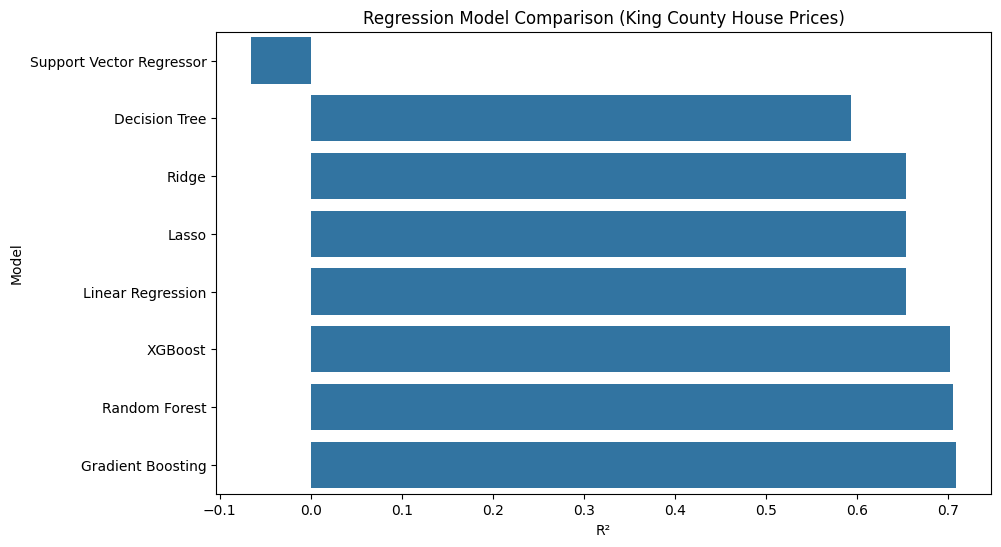

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x="R²", y="Model", data=results_df.sort_values(by="R²", ascending=True))
plt.title("Regression Model Comparison (King County House Prices)")
plt.show()

# Adjusted R² ???